# Assignment 2 - Spatial Data

***Student Name:***

Rik Luisman


***Student Number:***

s2584956


In this assignment, you will be asked to use your knowledge about spatial correlation functions and spatial weights to visualize several world bank data sets. Please be aware that your code is only part of the grade (60%). The actual visualization as well as your analytical approach in interpretation of the results will be graded as well (40%). The dealine for this assignment is **on October 24, 23:55 PM**.


**Submit the notebook, and a html version of your notebook via the github Classroom repo**. Please use your studentnumber as file name (i.e. s145678.ipynb and s145678.html). If you do not include both the notebook and the html file, your submission will NOT be considered.
The easiest way to covert your notebook to an html file is to open it via jupyter notebook and then select File -> Download as -> HTML.  
**Please try to do this multiple days before the deadline so we can help you if you run into problems!**

Tasks:

    1) select 2 SDGs 
    2) formulate your research questions 
    3) transform data into weight matrices, make Moran's plots and interpret them
    4) display data in choropleth maps 
    5) answer your research questions in a short summary
 

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import geopandas as gp 
import pandas as pd
import os
import libpysal as ps
import seaborn as sns


## Task 1: Sustainable Development Goals & Shapefiles

On this website: https://www.un.org/sustainabledevelopment/sustainable-development-goals/ the UN summarizes their sustainable development goals (SDGs). 

Select two goals to work on for this assignment.


***I will be working on these two goals:***
    

SDG3: Good health and Well-being\
SDG7: Affordable and clean energy

We would like you to focus on the African Continent for this exercise. Find shapefiles for the map of Africa and let us know where you found the shapefiles. Also let us know in which year the shapefiles were created and why this is relevant (hint: South Sudan). You might be able to find different shapefiles. Analyze your shapefiles. Like with any kind of "real" data, shapefiles can have *obstacles* that must be dealt with. For example, if your shapefile has islands, how do you define their adjacent countries? Shapefiles can also have *defects*. For example, an out of date shapefile might show old borders of a country, from when it used to border on another country that it's no longer adjacent to. Of course, if you're displaying historical data, that might be appropriate.
We want you to examine your shapefiles for obstacles, defects and other peculiarities. How will you handle them? Motivate your choice to use these specific shapefiles.

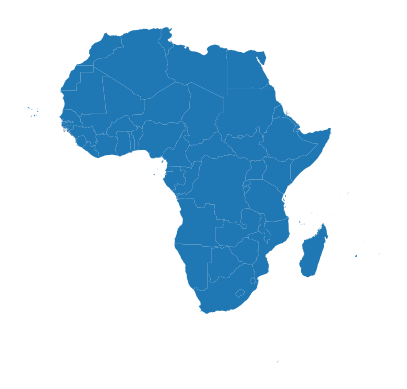

In [2]:
#Reading the shapefiles
shapefile = gp.read_file("afr_g2014_2013_0.shp")

#plotting shapefile 
ax = shapefile.plot()
ax.set_axis_off()

***Link to shapefiles:***

https://open.africa/dataset/africa-shapefiles

***Year shapefiles were created:***


Created: April 20, 2020. Last updated: November 9, 2023

***Motivation for selecting the shapefile:***

I used this shapefile, because it was the most up to date file: South Sudan is in the dataset, which is the most recent change in the border of the african country.

## Task 2: Research Questions & Data Sources

For every SDG, you can find "Goal x targets" on the UN website. Use these targets to formulate at least one question per SDG (i.e., at least two questions that you want to answer). The question can be about the current state of a SDG in Africa, comparing countries/regions within Africa or a longitudinal comparison of a region. 

Make your research question concrete. Something like "What is the state of SDG 7 in Africa?" is too broad. Something like: "Using variable x a proxy for the development of SDG 7, how do the West-African Countries fare compared to the rest of Africa?" is much more concrete, and narrows your question down to an achievable outcome. It also gives you something to discuss in your report.   

Discuss your research question on MS Teams if you are not sure. Help each other, also by asking for help if you are not used to formulate research questions yourself! 


We will answer doubts about research questions on Teams until **October 14, 23:55 PM**. That means: if you would like to have us answer your dobuts about resarch questions before you continue working on this assignment, make sure you post them until October 14, and we will answer as quickly as possible. After October 14 , we will not answer doubuts about research questions, but you will still be able to see what we answered and you can refer to the forum as a guideline. 


***1st research question:***



How does the number of covid 19 infections of South-Africa compare to the rest of Africa?

***2nd research question:***

Is there a clear spatial correlation in the acces to clean fuel and technology for cooking in Africa? If so, in which area is this the lowest?

On the worldbank website, you can easily find matching data: https://datacatalog.worldbank.org/dataset/sustainable-development-goals. You are free to use other data sources. Make sure to share them with us though. 

**Important:**

! We want to re-run your analyses, so please include a link to the data that you are using in your submission!




***Links to data:***

For the covid data I used: \
https://data.humdata.org/dataset/africa-covid-19-cumulative-infected-cases \
I must mention that i did adjust the excel sheet I downloaded. I changed some names of countries, because they did not aligh with those of the shapefile. Because the data I dowloaded is the cummulative number of infections I only used the last cell, because those of course represent the totla number of infections (from 2020-01-01 to 2021-08-20)

For the clean fuel data I used:
https://datacatalog.worldbank.org/dataset/sustainable-development-goals

## Task 3: Spatial Lag & Moran's Plot

In Lab 4 (http://darribas.org/gds16/labs/Lab_04.html) by Dani Arribas, you can see examples of weight matrices and at the end an explanation of spatial lag and the Morans plot (Watch out, this is not Moran's I/ Moran's spatial autocorrelation, which is also often calculated in spatial analytics), We have provided a modified version of this lab ready to go in this repo. 
Read and understand the concept of spatial lag first. In a Moran's plot, you can show how the value of a variable relates to it's spatial lag (or the average of this value in the surrounding areas). 

Additional information: 
* [Dani Arribas written course material](http://darribas.org/gds_scipy16/)
* [installing PySAL](https://pysal.org/docs/install/) and [PySAL tutorial](https://pysal.org/libpysal/tutorial.html)

Your tasks:

Create two Morans plots based on the variables related to your research questions and interpret them: 

What can you say about the entire continent?

Can you find meaningful subregions? 

What if you use block weights around those subregions and re-run the analysis? 

In [3]:
#reading the variables
df_covid = pd.read_excel('africa_covid19_cumulative_infections_national (3).xlsx')
df_clean = pd.read_excel('P_Data_Extract_From_World_Development_Indicators (1).xlsx')

In [4]:
#combining the shapefile and variables
combined_df = shapefile.merge(df_covid, how="left", left_on="ADM0_NAME", right_on="COUNTRY_NAME")
combined_df2 = shapefile.merge(df_clean, how="left", left_on="ADM0_NAME", right_on="Country Name")

#converting to numeric type
combined_df2['2022 [YR2022]'] = pd.to_numeric(combined_df2['2022 [YR2022]'], errors='coerce')

In [5]:
#Spatial lag, Morans Plot

#calculating the weigth matrices using the queen criteria:
#two observations only need to share a vortex (a single point) of their boundaries to be considered neighbors
w_queen = ps.weights.Queen.from_shapefile('afr_g2014_2013_0.shp')
w_queen_score = ps.weights.lag_spatial(w_queen, combined_df['TOTAL INFECTIONS']) #spatial lag for total covid infections
w_queen_score2 = ps.weights.lag_spatial(w_queen, combined_df2['2022 [YR2022]']) #spatial lag for clean fuel

/home/vscode/.local/lib/python3.9/site-packages/libpysal/cg/shapes.py:1492: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/home/vscode/.local/lib/python3.9/site-packages/libpysal/cg/shapes.py:1208: FutureWarning: Objects based on the `Geometry` class will deprecated and removed in a future version of libpysal.
  warnings.warn(dep_msg, FutureWarning)
/home/vscode/.local/lib/python3.9/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 9 islands with ids: 6, 9, 26, 30, 36, 48, 52, 57, 58.
  warnings.warn(message)


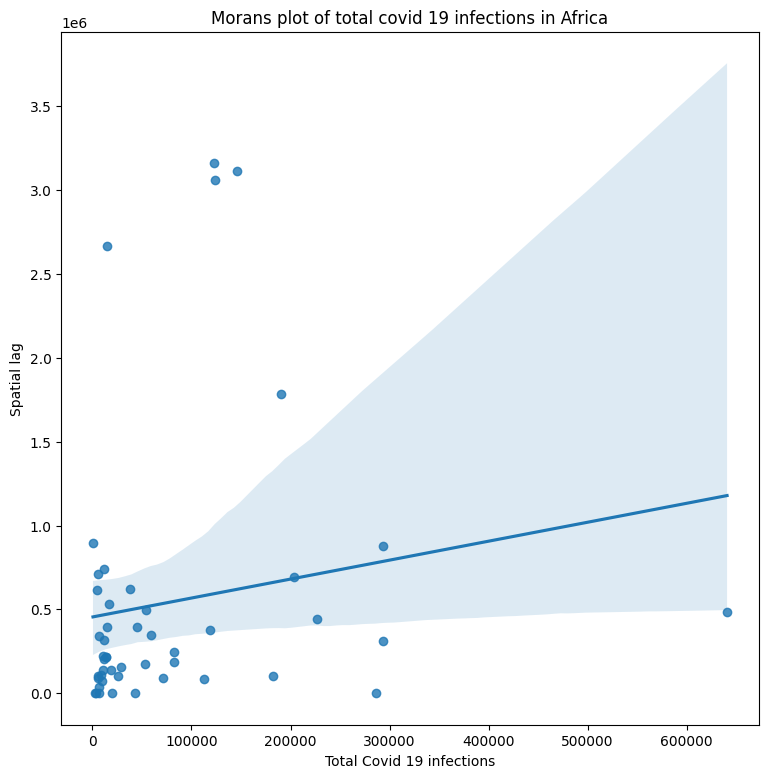

In [6]:
#adding the spatial lag to the dataframe
combined_df['w_queen_score'] = w_queen_score

#plot
f, ax = plt.subplots(1, figsize=(9, 9))
sns.regplot(x="TOTAL INFECTIONS", y="w_queen_score", data=combined_df)
plt.xlabel('Total Covid 19 infections')
plt.ylabel('Spatial lag')
# plt.xscale('log')
plt.title('Morans plot of total covid 19 infections in Africa')
plt.show()

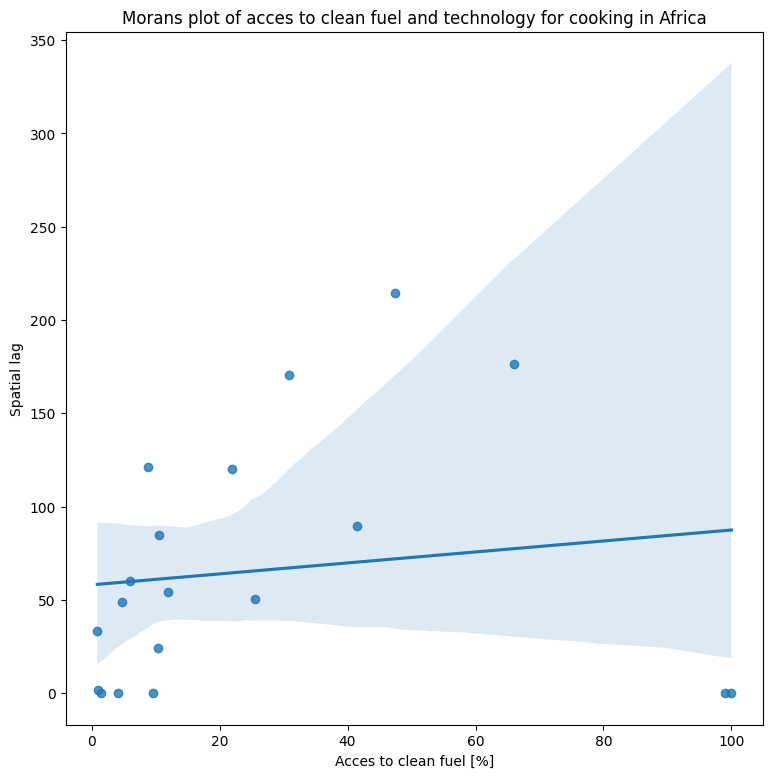

In [7]:
#adding the spatial lag to the dataframe
combined_df2['w_queen_score'] = w_queen_score2

#plot
f, ax = plt.subplots(1, figsize=(9, 9))
sns.regplot(x="2022 [YR2022]", y="w_queen_score", data=combined_df2)
plt.xlabel('Acces to clean fuel [%]')
plt.ylabel('Spatial lag')
plt.title('Morans plot of acces to clean fuel and technology for cooking in Africa')
plt.show()

***Interpretation:***

Covid case:\
In the Moran's plot of the total covid 19 infections in Africa we can see that most of the datapoints are located in the lower left corner, suggesting that most of the countries that have a low total infection number are neighbors with countries that also have a low total number of infections. We can also see that there is one country (lower right) which has a very high number of infections and is mainly neighbors with countries which have a low number of infections. In line with this, we see that (4 or 5 datapoints in the upper left) there are 4 or 5 countries which have a low number of infections and have neighbors which have a high number of infections.\
\
Clean fuel case:\
In the Moran's plot of the acces to clean fuel and technology for cooking in Africa we can see that the plot is overall less extreme and more diverse, suggesting values of countries that are on average more in line with each other. We do however see that there are two very extreme outliers on the the bottom right. This suggests that there are two countries with a very a value that have neighbors with a very low value. But it is weird that there are some values for the spatial lag that are 0, so I have to look into that using the choropleth plots. In addition, we see that there are less datapoints, suggesting that not all data is available.

Note that the fitted line is a result of the way I plotted the Moran's plot and is of course for both cases not a good fit, which can also be seen by the huge error bars.



## Task 4: Choropleth Maps

Use the same two variables you used in Task 3 and create a Choropleth Map. A choropleth map is a type of map which uses differences in shading, colouring, or the placing of symbols within predefined areas to indicate the average values of a particular quantity in those areas. Do a research on color-blindness and how to avoid it in creating visualisation. Choose a color-blind proof colour combination. Indicate where you found it and why you trust it with color-blind proofness. 


Does the map correspond to the findings in Morans plot?


***Chosen Colour map & motivation:*** 

The colormap I chose is 'cividis', which is an variation of the well known 'viridis' colormap, such that it is both colorblind friendly and it looks identical to colorblind and non-colorblind users. 

https://matplotlib.org/stable/users/prev_whats_new/whats_new_2.2.html

***Choropleth Maps***

Text(0.5, 1.0, 'Choropleth map of total covid 19 infections in Africa')

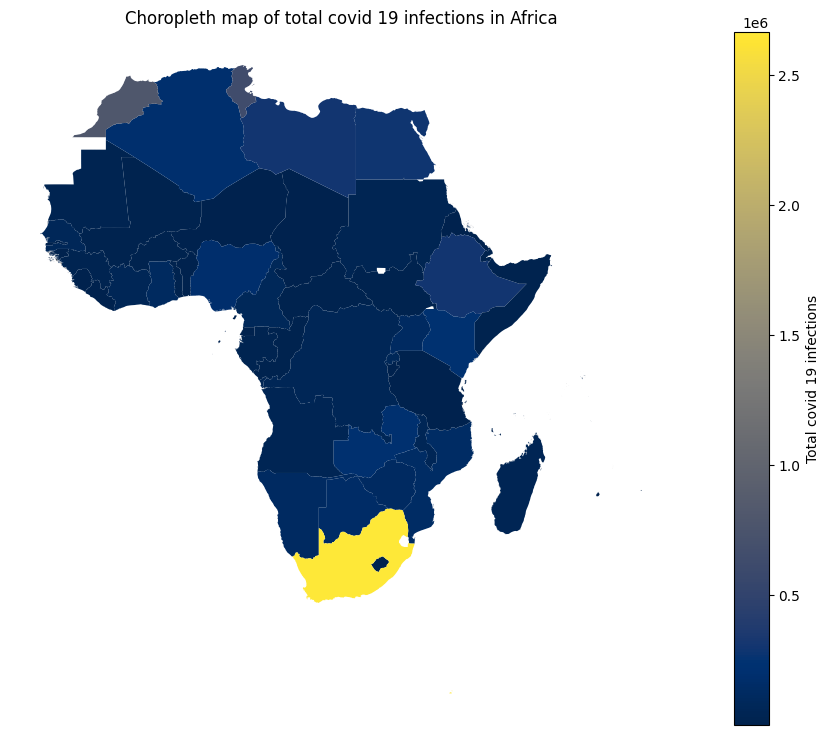

In [8]:
#choropleth map of total covid 19 infections
choropleth = combined_df.plot(column="TOTAL INFECTIONS"
                      ,figsize=(16, 9)
                      ,legend= True
                      ,cmap = 'cividis')
choropleth.set_axis_off()
cbar = choropleth.get_figure().get_axes()[1]
cbar.set_ylabel('Total covid 19 infections')
plt.title('Choropleth map of total covid 19 infections in Africa')

Text(0.5, 1.0, 'Choropleth map of acces [%] to clean fuel in Africa')

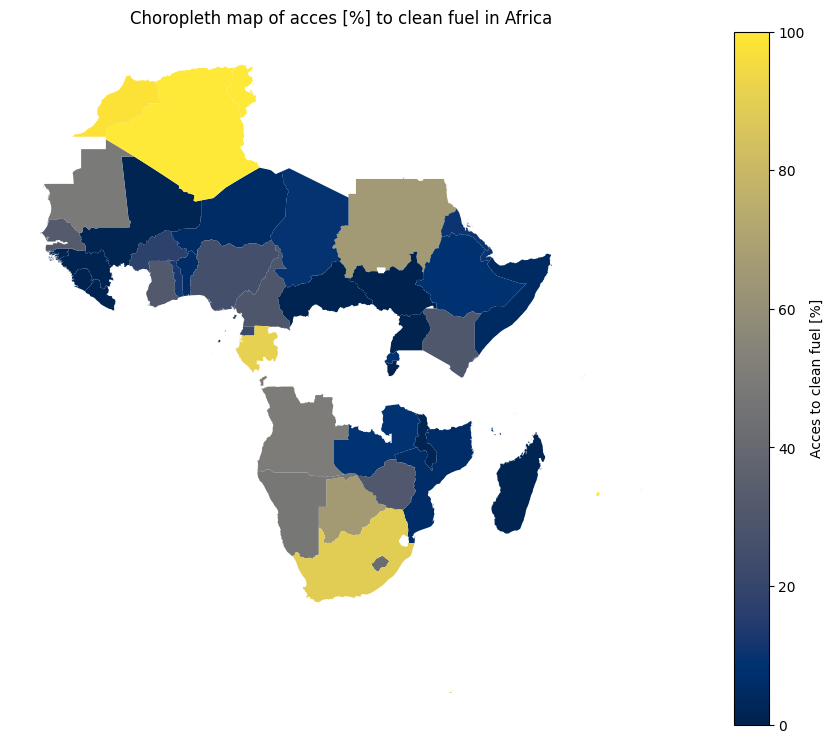

In [9]:
#choropleth map of total acces to clean fuel
choropleth = combined_df2.plot(column="2022 [YR2022]"
                      , k=10, figsize=(16, 9)
                      ,legend= True
                      ,cmap = 'cividis')
choropleth.set_axis_off()
cbar = choropleth.get_figure().get_axes()[1]
cbar.set_ylabel('Acces to clean fuel [%]')
plt.title('Choropleth map of acces [%] to clean fuel in Africa')

***Interpretation:***

The covid case:\
For the choropleth map of the total number of infections we see that there is data for almost all countries in the African continent, except for eSwatini and the Western Sahara. We see, as we would have expected from Moran's plot, that there is 1 very abundant outlier: South Africa. South africa has 5 neighbors as we predicted via the Moran's plot. Lastly, we can see that there are still a couple of white spots on the map. These spots correspond to territories that are unclaimed or rather, where multiple countries have claimed that area.

The clean fuel case:\
For the choropleth map of the acces to clean fuel and technology for cooking we have significantly less data. To compare it to the Moran's plot we do indeed see that there are less extreme outliers and the values are more diverse. We see that Marocco and Algeria have near a 100% acces to clean fuel and technology for cooking, whereas most middle african countries are closer to 0%. This high discrepancy is very concerning.

Using the choropleth maps we can now also see why there exist spatial lag values of 0. The reasons for this are: firstly, there are islands, which do not have neighbors. Secondly, for the 2nd choropleth there ar a couple of countries with just one neighbor, due to the incompleteness of the data, and those neighboring countries have a acces value of 0% or very close to 0%.

## Task 5: Report

You visualized two variables related to your research questions. How would you interpret your findings and how does it help you to answer your research questions? 

Which extra variables would you like to use? What information are you missing in your current data? What kind of data could you use to improve your analysis?

Try to answer your research questions and don't shy away from suggesting future research. 

***Answer your research questions in 200-400 words:***

The first research questions was:\
How does the number of covid 19 infections of South-Africa compare to the rest of Africa?\
To elaborate on this question. We see from both the Moran's plot and the choropleth map that the total number of infections of South Africa is significantly higher than for the rest of Africa. However the data I used did not take the national populations into account. To get a better understanding of the infections, it would be good to also include the population per country in the analysis.

The second research questions was:\
Is there a clear spatial correlation in the acces to clean fuel and technology for cooking in Africa? If so, in which area is this the lowest?\
To elaborate on this research question. For this question we can see in the choropleth map that there is somewhat of a spatial correlation for the acces to clean fuel and technology for cooking. Namely, we see that most countries with a high value, except for Gabon, are either in the Northern or Southern region of Africa. So the qualatative answer to the question is Yes and that middel Africa has the lowest acces value. However, to give a quantatative answer to the question more research is needed. I could for example look at the average value of the Northern, Middel and Southern countries in Africa or calculate the acces value as a function of the latitide of each country. In addition, we see that some crucial data is missing, in order to give a exclusive answer to the question. 




## How do we grade this assignment?
Please pay attention to the following points. We consider these in calculating your final grade.

First of all, we check if you have handed in the Jupyter notebook as well as a .pdf and .html version.

1st part


1.   We inspect the access to the correct shapefile from the link you have provides.
2.   We consider if the shapefile is suitable for answering your research question.
3. We consider your reasoning and motivation for selecting the shapefile.



2nd part
1. We consider the validity, scope and concreteness of the questions.
2. We inspect the data sources.


3rd part
1. We consider the Moran plots.
2. We consider the interpretations of the plots.

4th part
1. We consider the choropleth maps.
2. We consider the color scheme used in the maps and that a right process is used for selecting the color scheme.

5th part 
1. We consider the quality of your report and if each research question is concretely answered. 
2. We consider your reflection on the data you used.
3. We consider the interpretations deduced from the plots.
4. We consider your ideas for additional data and further research.
